In [92]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls data/Fresno/

 CO_PICKDATA_2014-12-31.csv	      PM25HR_PICKDATA_2015-12-31.csv
 CO_PICKDATA_2015-12-31.csv	      PM25HR_PICKDATA_2016-12-31.csv
 CO_PICKDATA_2016-12-31.csv	      SORAD_PICKDATA_2014-12-31.csv
 NOX_PICKDATA_2014-12-31.csv	      SORAD_PICKDATA_2015-12-31.csv
 NOX_PICKDATA_2015-12-31.csv	      SORAD_PICKDATA_2016-12-31.csv
 NOX_PICKDATA_2016-12-31.csv	      TEMP_PICKDATA_2014-12-31.csv
'OZONE_PICKDATA_2014-12-31 (1).csv'   TEMP_PICKDATA_2015-12-31.csv
 OZONE_PICKDATA_2015-12-31.csv	     'TEMP_PICKDATA_2016-12-31 (1).csv'
 OZONE_PICKDATA_2016-12-31.csv	      TEMP_PICKDATA_2016-12-31.csv
 PM10_LHR_PICKDATA_2014-12-31.csv     WINSPD_PICKDATA_2014-12-31.csv
 PM10_LHR_PICKDATA_2015-12-31.csv     WINSPD_PICKDATA_2015-12-31.csv
 PM10_LHR_PICKDATA_2016-12-31.csv     WINSPD_PICKDATA_2016-12-31.csv
 PM25HR_PICKDATA_2014-12-31.csv


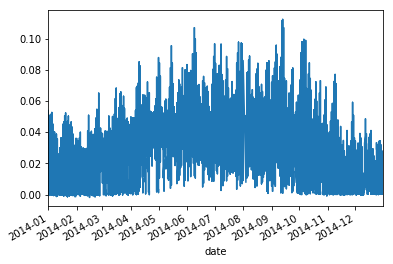

In [36]:
filename = 'data/Fresno/OZONE_PICKDATA_2014-12-31 (1).csv'
df1 = pd.read_csv(filename, parse_dates=[1])
df1.dropna(subset=['value'], inplace=True)
df1.date = pd.to_datetime(df1.date, format="%Y-%m-%d")
df1.index = df1.date
df1.sort_index(inplace=True)
df1.value.plot()

In [37]:
def read_file(filename):
    df = pd.read_csv(filename, parse_dates=[1])
    df.dropna(subset=['value'], inplace=True)
    df.date = pd.to_datetime(df.date, format="%Y-%m-%d")
    df.index = df.date
    df.sort_index(inplace=True)
    return df

,site,date,start_hour,value,variable,units,quality,prelim,name
date,,,,,,,,,
2015-01-01,3781,2015-01-01,0.0,0.0015,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,1.0,0.0014,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,2.0,0.0008,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,3.0,0.0010,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,5.0,0.0016,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland


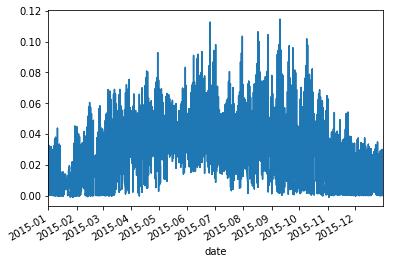

In [38]:
df2 = read_file('data/Fresno/OZONE_PICKDATA_2015-12-31.csv')
df2.value.plot()
df2.head()

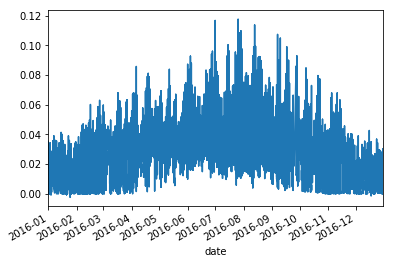

In [39]:
df3 = read_file('data/Fresno/OZONE_PICKDATA_2016-12-31.csv')
df3.value.plot()

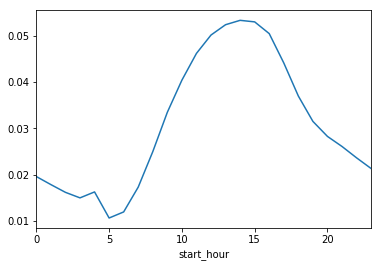

In [30]:
df_tot = pd.concat([df1, df2, df3])
hourly_mean = df_tot.groupby('start_hour').value.mean()
hourly_mean.plot()

count    23.000000
mean      0.013675
std       0.011296
min       0.003015
25%       0.005632
50%       0.006648
75%       0.022975
max       0.034525
Name: value, dtype: float64

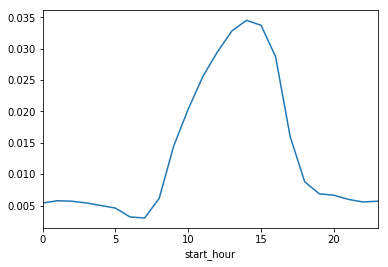

In [85]:
winter = df1.loc[ df1['date'].map( lambda x: x.month >= 12 or x.month < 3 ) ]
winter_hourly = winter.groupby('start_hour').value.mean()
winter_hourly.plot()
winter_hourly.describe()

In [104]:
def get_data_season(df_in, months):
    df = df_in.loc[ df_in['date'].map( lambda x: x.month in months )]
    return df

count    23.000000
mean      0.036310
std       0.014725
min       0.013614
25%       0.023180
50%       0.035520
75%       0.050856
max       0.056654
Name: value, dtype: float64

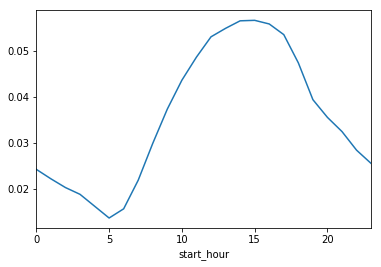

In [105]:
spring = get_data_season(df1, [3, 4, 5])
spring_hourly = spring.groupby('start_hour').value.mean()
spring_hourly.plot()
spring_hourly.describe()

count    23.000000
mean      0.046390
std       0.017986
min       0.014270
25%       0.030307
50%       0.048578
75%       0.064960
max       0.067330
Name: value, dtype: float64

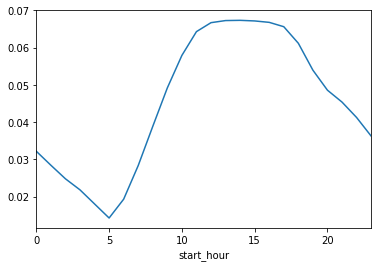

In [106]:
summer = get_data_season(df1, [6, 7, 8])
summer_hourly = summer.groupby('start_hour').value.mean()
summer_hourly.plot()
summer_hourly.describe()

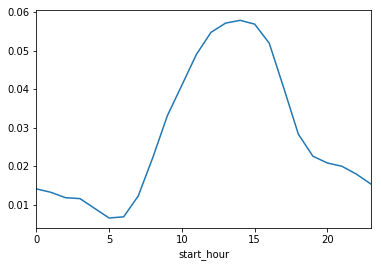

In [107]:
fall = get_data_season(df1, [9, 10, 11])
fall_hourly = fall.groupby('start_hour').value.mean()
fall_hourly.plot()

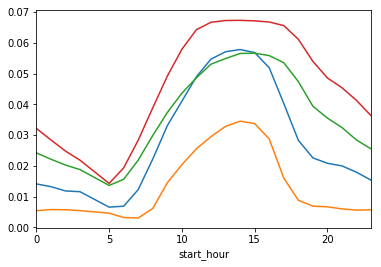

In [108]:

fall_hourly.plot()
winter_hourly.plot()
spring_hourly.plot()
summer_hourly.plot()